In [1]:
%matplotlib inline

In [2]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
DESIGN_URL = 'https://earthquake.usgs.gov/ws/designmaps/asce7-16.json?latitude=%.3f&longitude=%.3f&riskCategory=%s&siteClass=%s&title=%s'

In [4]:
def get_design_info(lat, lon, category='I', siteclass='C', title='Example'):
    url = DESIGN_URL % (lat,lon,category,siteclass,title)
    response = requests.get(url)
    jdict = response.json()
    return jdict

In [5]:
response1 = get_design_info(37.760, -122.445, category='III', siteclass='C') #SF, CA
response2 = get_design_info(40.763, -119.901, category='III', siteclass='C') #Salt Lake City
response3 = get_design_info(32.790, -79.934, category='III', siteclass='C') #Charleston, SC

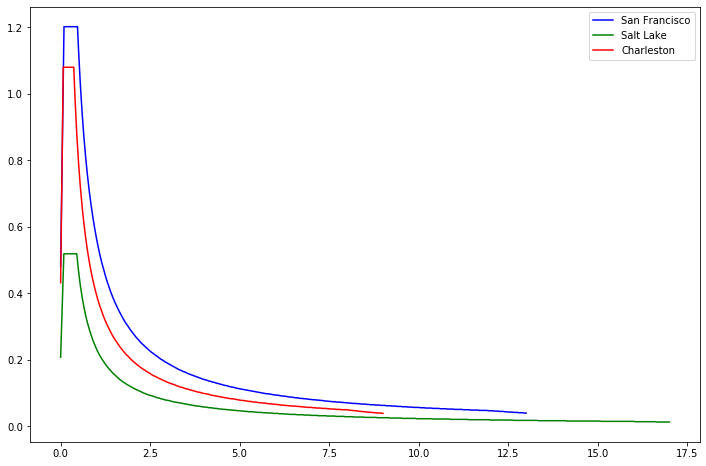

In [6]:
spectrum1 = np.array(response1['response']['data']['sdSpectrum'])
spectrum2 = np.array(response2['response']['data']['sdSpectrum'])
spectrum3 = np.array(response3['response']['data']['sdSpectrum'])
plt.figure(figsize=(12,8));
plt.plot(spectrum1[:,0],spectrum1[:,1],'b');
plt.plot(spectrum2[:,0],spectrum2[:,1],'g');
plt.plot(spectrum3[:,0],spectrum3[:,1],'r');
plt.legend(['San Francisco','Salt Lake','Charleston']);